 The basic global threshold, T, is 
calculated as follows:
 1. Select an initial estimate for T (typically the 
average grey level in the image)
 2. Segment the image using T to produce two 
groups of pixels: G1 consisting of pixels 
with grey levels >T and G2 consisting 
pixels with grey levels ≤ T
 3. Compute the average grey levels of pixels 
in G1 to give μ1 and G2 to give μ2
4. Compute a new threshold value:
 T= u1+u2/2
 5. Repeat steps 2 – 4 until the difference in T 
in successive iterations is less than a 
predefined limit T∞
 • This algorithm works well for finding 
thresholds when the histogram can be 
partitioned


In [1]:
# Importing all the necessary libraries
import matplotlib.pyplot as plt 
import cv2
import numpy as np

In [2]:
class Question2:
    def __init__(self):
        self.img1 = cv2.imread("white-flower.png")
        self.img2 = cv2.imread("butterfly.jpg")
        self.img3 = cv2.imread("camel.png")
        self.img_1 = cv2.cvtColor(self.img1, cv2.COLOR_BGR2RGB) # converting bgr to rgb for plotting purpose
        self.img_2 = cv2.cvtColor(self.img2, cv2.COLOR_BGR2RGB)
        self.img_3 = cv2.cvtColor(self.img3, cv2.COLOR_BGR2RGB)
    
    def kMeans_segmentation(self,img,K=8):
        Z = img.reshape((-1,3))
        Z = np.float32(Z)

        # define criteria, number of clusters(K) and apply kmeans()
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
        ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

        # Now convert back into uint8, and make original image
        center = np.uint8(center)
        res = center[label.flatten()]
        res2 = res.reshape((img.shape))
        return res2
    

    def mean_shift_segmentation(self,img, spatial_radius=40, color_radius=40, max_pyr_level=1):
        # Apply mean shift segmentation
        segmented_img = cv2.pyrMeanShiftFiltering(img, sp=spatial_radius, sr=color_radius, maxLevel=max_pyr_level)

        return segmented_img

if __name__ == "__main__":
    question2 = Question2()


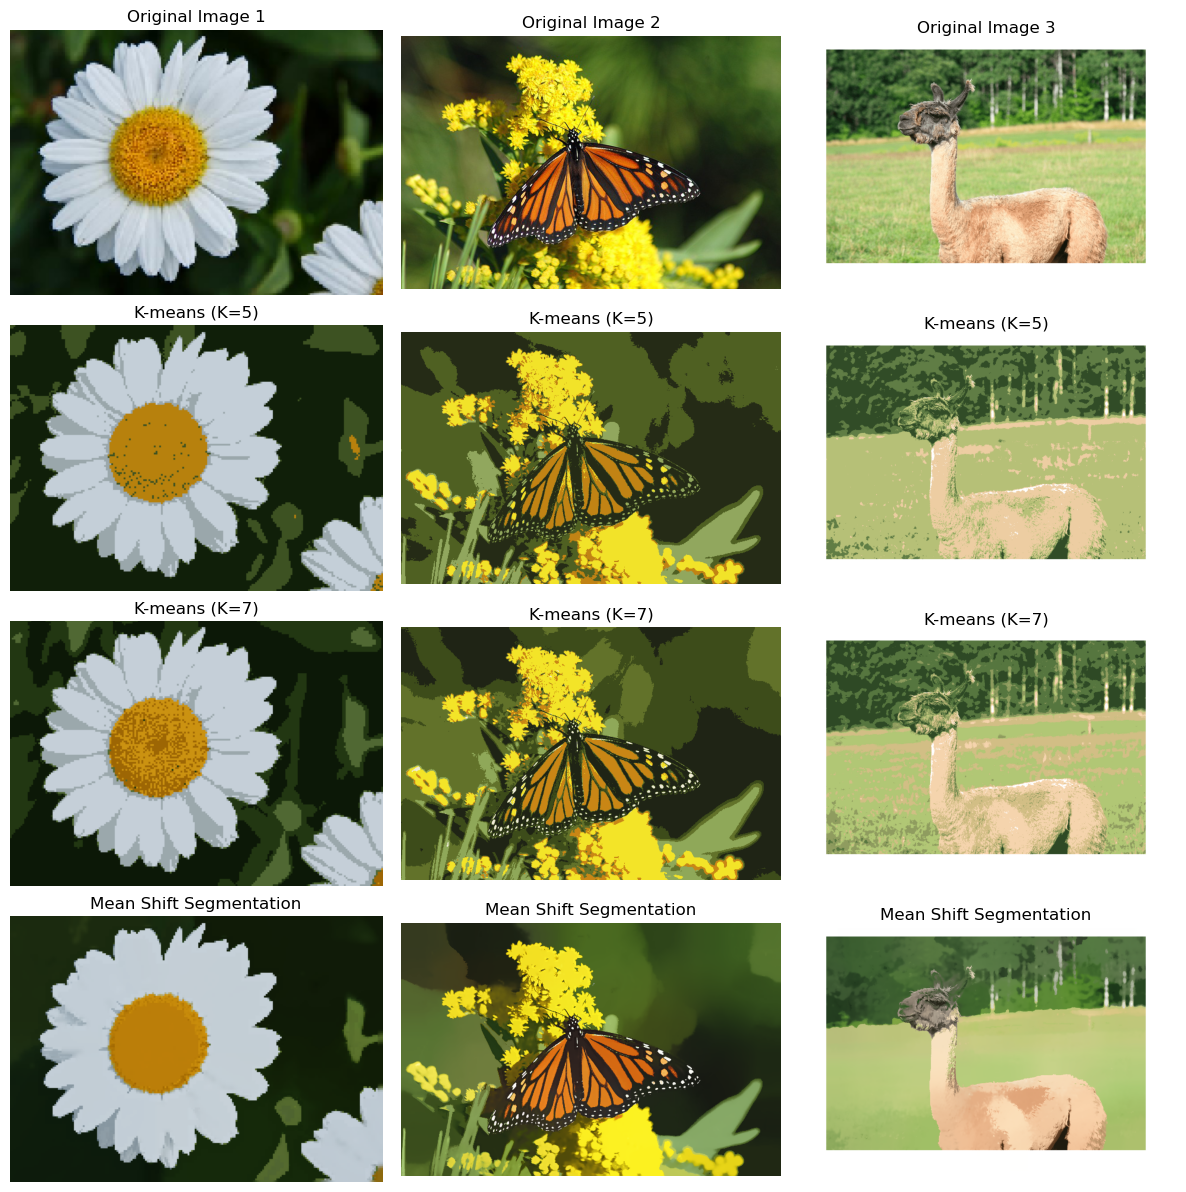

In [3]:
# Set up the subplot grid
fig, axs = plt.subplots(4, 3, figsize=(12, 12))

# Original images
axs[0, 0].imshow(question2.img_1)
axs[0, 0].set_title('Original Image 1')
axs[0, 0].axis('off')

axs[0, 1].imshow(question2.img_2)
axs[0, 1].set_title('Original Image 2')
axs[0, 1].axis('off')

axs[0, 2].imshow(question2.img_3)
axs[0, 2].set_title('Original Image 3')
axs[0, 2].axis('off')

# K-means with K=5
axs[1, 0].imshow(question2.kMeans_segmentation(question2.img_1, K=5))
axs[1, 0].set_title('K-means (K=5)')
axs[1, 0].axis('off')

axs[1, 1].imshow(question2.kMeans_segmentation(question2.img_2, K=5))
axs[1, 1].set_title('K-means (K=5)')
axs[1, 1].axis('off')

axs[1, 2].imshow(question2.kMeans_segmentation(question2.img_3, K=5))
axs[1, 2].set_title('K-means (K=5)')
axs[1, 2].axis('off')

# K-means with K=7
axs[2, 0].imshow(question2.kMeans_segmentation(question2.img_1, K=7))
axs[2, 0].set_title('K-means (K=7)')
axs[2, 0].axis('off')

axs[2, 1].imshow(question2.kMeans_segmentation(question2.img_2, K=7))
axs[2, 1].set_title('K-means (K=7)')
axs[2, 1].axis('off')

axs[2, 2].imshow(question2.kMeans_segmentation(question2.img_3, K=7))
axs[2, 2].set_title('K-means (K=7)')
axs[2, 2].axis('off')

# Mean shift segmentation
axs[3, 0].imshow(question2.mean_shift_segmentation(question2.img_1))
axs[3, 0].set_title('Mean Shift Segmentation')
axs[3, 0].axis('off')

axs[3, 1].imshow(question2.mean_shift_segmentation(question2.img_2))
axs[3, 1].set_title('Mean Shift Segmentation')
axs[3, 1].axis('off')

axs[3, 2].imshow(question2.mean_shift_segmentation(question2.img_3))
axs[3, 2].set_title('Mean Shift Segmentation')
axs[3, 2].axis('off')

plt.tight_layout()
plt.show()

https://docs.opencv.org/4.x/dc/d0d/tutorial_py_features_harris.html

In [4]:
class Question3:

    def __init__(self):
        self.img = cv2.imread("chessboard.png")
        self.img_ = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB) # converting bgr to rgb for plotting purpose


    def harris_corner_detector(self, img, block_size=2, ksize=3, k=0.04):
        """
        Detect corners in an image using the Harris corner detection algorithm.

        Parameters:
        - img: Input image (grayscale).
        - block_size: Size of the neighborhood considered for corner detection.
        - ksize: Aperture parameter for the Sobel operator.
        - k: Harris detector free parameter.

        Returns:
        - img_with_corners: Image with detected corners highlighted.
        """
        # Convert to grayscale if the image is not already
        if len(img.shape) == 3:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        else:
            gray = img

        # Convert to float32
        gray = np.float32(gray)

        # Apply Harris corner detection
        dst = cv2.cornerHarris(gray, blockSize=block_size, ksize=ksize, k=k)

        # Result is dilated for marking the corners
        dst = cv2.dilate(dst, None)

        # Create an output image to display corners
        img_with_corners = img.copy()

        # Threshold for an optimal value (you can adjust this)
        threshold = 0.01 * dst.max()
        img_with_corners[dst > threshold] = [0, 0, 255]  # Mark corners in red

        return img_with_corners

# Example of usage
if __name__ == "__main__":
    question3 = Question3()

        

In [5]:
cv2.imshow('res2',question3.harris_corner_detector(question3.img))
cv2.waitKey(0)
cv2.destroyAllWindows()

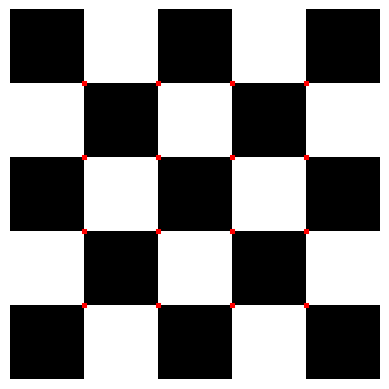

In [6]:
plt.imshow(cv2.cvtColor(question3.harris_corner_detector(question3.img), cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [7]:
class Question4:
    def __init__(self):
        self.img1 = cv2.imread("coins.jpg")
        # self.img = cv2.imread("opencv.png", cv2.IMREAD_GRAYSCALE)
        self.img2 = cv2.imread("chessboard.png")
        self.img_1 = cv2.cvtColor(self.img1, cv2.COLOR_BGR2RGB)
        self.img_2 = cv2.cvtColor(self.img2, cv2.COLOR_BGR2RGB)
    
 

    def hough_line_transform(self,img, rho=1, theta=np.pi/180, threshold=100):
        """
        Apply Hough Transform to detect lines in an image.

        Parameters:
        - img: Input image (grayscale).
        - rho: Distance resolution of the accumulator in pixels.
        - theta: Angle resolution of the accumulator in radians.
        - threshold: Accumulator threshold parameter. Only those lines are returned that get enough votes ( > threshold).

        Returns:
        - img_with_lines: Image with detected lines drawn on it.
        """
        # Convert to grayscale if the image is not already
        if len(img.shape) == 3:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        else:
            gray = img

        # Apply Canny edge detection
        edges = cv2.Canny(gray, 50, 150, apertureSize=3)

        # Apply Hough Transform
        lines = cv2.HoughLines(edges, rho, theta, threshold)

        # Create an output image to draw the lines
        img_with_lines = img.copy()

        # Draw the lines on the output image
        if lines is not None:
            for rho, theta in lines[:, 0]:
                # Convert polar coordinates to Cartesian coordinates
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a * rho
                y0 = b * rho
                x1 = int(x0 + 1000 * (-b))  # Extend line
                y1 = int(y0 + 1000 * (a))
                x2 = int(x0 - 1000 * (-b))  # Extend line in the other direction
                y2 = int(y0 - 1000 * (a))

                # Draw the line on the output image
                cv2.line(img_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green color

        return img_with_lines
    
    def hough_circle_transform(self):
        # # Load the image
        # image_path = 'coins.jpg'
        image = self.img1
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply a Gaussian blur to reduce noise and improve circle detection
        blurred = cv2.GaussianBlur(gray, (9, 9), 2)

        # Apply Hough Circle Transform to detect circles
        circles = cv2.HoughCircles(
            blurred,
            cv2.HOUGH_GRADIENT,
            dp=1.2,              # Inverse ratio of the accumulator resolution to the image resolution
            minDist=150,          # Minimum distance between detected centers
            param1=200,           # Higher threshold for the Canny edge detector
            param2=70,           # Accumulator threshold for the circle centers
            minRadius=100,        # Minimum radius of circles to detect
            maxRadius=160         # Maximum radius of circles to detect
        )

        # Draw the detected circles
        if circles is not None:
            circles = np.uint16(np.around(circles))
            for i in circles[0, :]:
                # Draw the outer circle
                cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 15)
                # Draw the center of the circle
                cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 15)

        # Display the result
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title('Detected Circles')
        plt.show()

# Example of usage
if __name__ == "__main__":
    question4 = Question4()



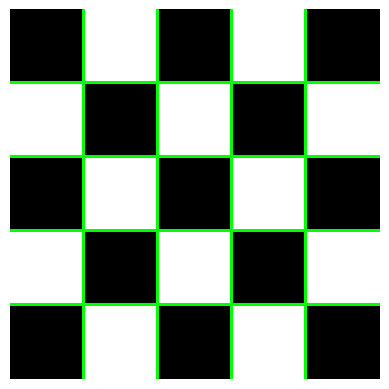

In [8]:
plt.imshow(cv2.cvtColor(question4.hough_line_transform(question4.img2), cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [9]:
cv2.imshow('Hough Transform Lines', question4.hough_line_transform(question4.img2))
cv2.waitKey(0)
cv2.destroyAllWindows()

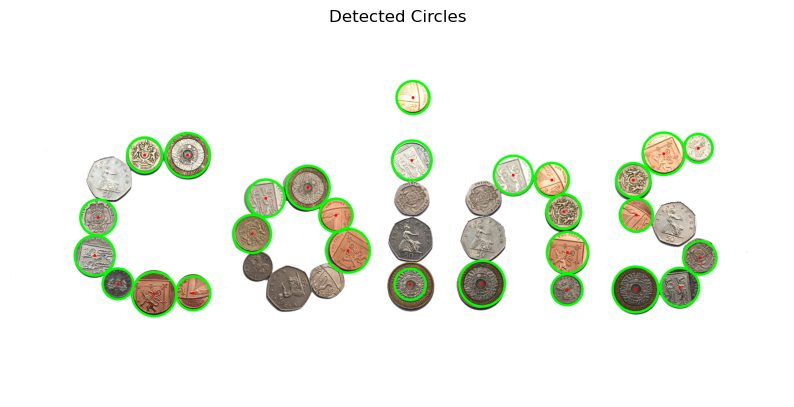

In [10]:
question4.hough_circle_transform()

In [11]:
class Question5:
    def __init__(self):
        self.img1 = cv2.imread("image1.png",cv2.IMREAD_GRAYSCALE)
        self.img2 = cv2.imread("image2.png",cv2.IMREAD_GRAYSCALE)
    def SIFTdescriptor_featureMatching(self):

        # # Load images
        # img1 = cv2.imread('image1.png', cv2.IMREAD_GRAYSCALE)
        # img2 = cv2.imread('image2.png', cv2.IMREAD_GRAYSCALE)

        # Initiate SIFT detector
        sift = cv2.SIFT_create()
        # Find the keypoints and descriptors with SIFT
        kp1, des1 = sift.detectAndCompute(self.img1, None)
        kp2, des2 = sift.detectAndCompute(self.img2, None)

        #We will now define the FLANN parameters. Here, trees is the number of bins you want.
        # Match keypoints using FLANN
        FLANN_INDEX_KDTREE = 1
        index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
        search_params = dict(checks=50)
        flann = cv2.FlannBasedMatcher(index_params, search_params)

        matches = flann.knnMatch(des1, des2, k=2)

        #We will only draw good matches, so create a mask.
        matchesMask = [[0,0] for i in range(len(matches))]


        # We can perform a ratio test to determine good matches.
        # Apply ratio test

        for i, (m, n) in enumerate(matches):
            if m.distance < 0.7 * n.distance:
                matchesMask[i] = [1, 0]


        # Now let’s visualize the matches.
        draw_params = dict(
            matchColor=(0, 255, 0),
            singlePointColor=(255, 0, 0),
            matchesMask=matchesMask,
            flags=cv2.DrawMatchesFlags_DEFAULT,
        )


        img3 = cv2.drawMatchesKnn(self.img1, kp1, self.img2, kp2, matches, None, **draw_params)
        return img3
    
    def sift_brutef_knn(self):
        # initializing SIFT detector.
        sift = cv2.SIFT_create()

        #Find the keypoints and descriptors with SIFT.
        kp1, des1 = sift.detectAndCompute(self.img1, None)
        kp2, des2 = sift.detectAndCompute(self.img2, None)

        #Find matches using k nearest neighbors.
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(des1, des2, k=2)


        #Apply ratio test to threshold the best matches.
        good = []
        for m, n in matches:
            if m.distance < 0.75 * n.distance:
                good.append([m])
        # Draw the matches.
        img3 = cv2.drawMatchesKnn(
            self.img1, kp1, self.img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
        )
        return img3
    
if __name__=="__main__":
    question5 = Question5()

        

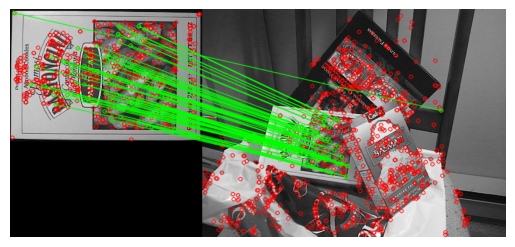

In [12]:
import matplotlib.pyplot as plt
plt.imshow(question5.SIFTdescriptor_featureMatching())
plt.axis('off')
plt.show()

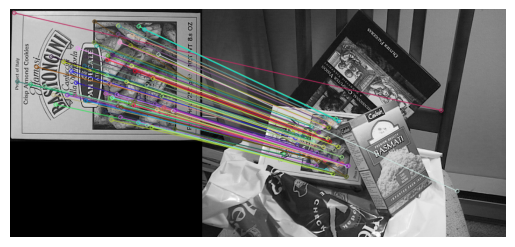

In [13]:
import matplotlib.pyplot as plt
plt.imshow(question5.sift_brutef_knn())
plt.axis('off')
plt.show()

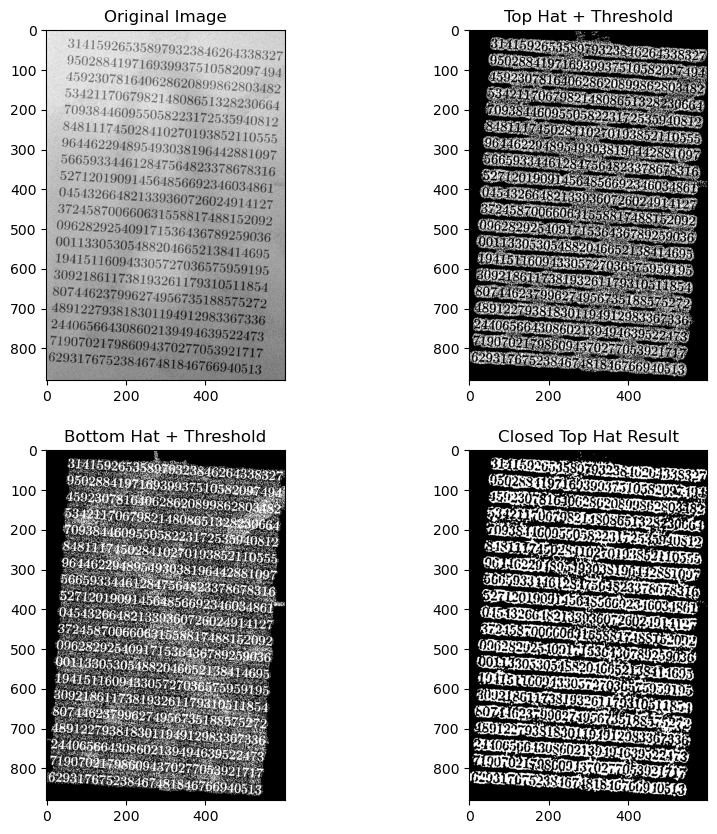

In [14]:
class Question1:
    def __init__(self):
        # Load the image
        self.img1 = cv2.imread('morf_test.png', cv2.IMREAD_GRAYSCALE)

    
    def quest1(self):
        image= self.img1

        # Estimate the background using a large Gaussian blur
        background = cv2.GaussianBlur(image, (35, 35), 0)

        # Subtract the background from the original image
        image_subtracted = cv2.subtract(image, background)

        # Try top hat or bottom hat filtering (choose based on test results)
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
        top_hat = cv2.morphologyEx(image_subtracted, cv2.MORPH_TOPHAT, kernel)
        bottom_hat = cv2.morphologyEx(image_subtracted, cv2.MORPH_BLACKHAT, kernel)

        # Apply global thresholding (Otsu’s method is often effective)
        _, thresh_top_hat = cv2.threshold(top_hat, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        _, thresh_bottom_hat = cv2.threshold(bottom_hat, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Optionally, apply a noise filter like median blur
        filtered_top_hat = cv2.medianBlur(thresh_top_hat, 3)
        filtered_bottom_hat = cv2.medianBlur(thresh_bottom_hat, 3)

        # Apply morphological operations to refine segmentation (e.g., close gaps)
        closing_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
        closed_top_hat = cv2.morphologyEx(filtered_top_hat, cv2.MORPH_CLOSE, closing_kernel)
        closed_bottom_hat = cv2.morphologyEx(filtered_bottom_hat, cv2.MORPH_CLOSE, closing_kernel)

        # Display results
        plt.figure(figsize=(10, 10))
        plt.subplot(221), plt.imshow(image, cmap='gray'), plt.title('Original Image')
        plt.subplot(222), plt.imshow(thresh_top_hat, cmap='gray'), plt.title('Top Hat + Threshold')
        plt.subplot(223), plt.imshow(thresh_bottom_hat, cmap='gray'), plt.title('Bottom Hat + Threshold')
        plt.subplot(224), plt.imshow(closed_top_hat, cmap='gray'), plt.title('Closed Top Hat Result')
        plt.show()

if __name__=="__main__":
    question1 = Question1()
question1.quest1()



In [1]:
import cv2
import numpy as np
class Question6:
    def __init__(self):
        self.cap = cv2.VideoCapture("traffic.mp4")
        self.frameIds = self.cap.get(cv2.CAP_PROP_FRAME_COUNT)* np.random.uniform(size=25)

    def Background_estimation(self):
        # Store selected frames in an array
        frames = []
        for fid in self.frameIds:
            self.cap.set(cv2.CAP_PROP_POS_FRAMES, fid)
            ret, frame = self.cap.read()
            frames.append(frame)
        
        # Calculate the median along the time axis
        medianFrame = np.median(frames, axis=0).astype(dtype=np.uint8)    
        return medianFrame
    def frame_differencing(self):
        # Reset frame number to 0
        self.cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
        # Convert background to grayscale
        grayMedianFrame = cv2.cvtColor(self.Background_estimation(), cv2.COLOR_BGR2GRAY)
        # Loop over all frames
        ret = True
        while(ret):
        
            # Read frame
            ret, frame = self.cap.read()
            # Convert current frame to grayscale
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # Calculate absolute difference of current frame and 
            # the median frame
            dframe = cv2.absdiff(gray, grayMedianFrame)
            # Treshold to binarize
            th, dframe = cv2.threshold(dframe, 30, 255, cv2.THRESH_BINARY)
            dilated = cv2.dilate(dframe,cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)),iterations = 2)
            contours, hier = cv2.findContours(dilated,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # check every contour if are exceed certain value draw bounding boxes
            for contour in contours:
                # if area exceed certain value then draw bounding boxes
                if cv2.contourArea(contour) > 50:
                    (x,y,w,h) = cv2.boundingRect(contour)
                    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 255, 0), 2)


            # Display image
            cv2.imshow('frame', dframe)
            cv2.imshow("detection", frame)
            if cv2.waitKey(30) & 0xff == 27:
                break
            

        # Release video object
        self.cap.release()
        
        # Destroy all windows
        cv2.destroyAllWindows()
 




if __name__=="__main__":
    question6 = Question6()



In [2]:
# Display median frame
cv2.imshow('frame', question6.Background_estimation())
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
question6.frame_differencing()